In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
###Load the image

In [2]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

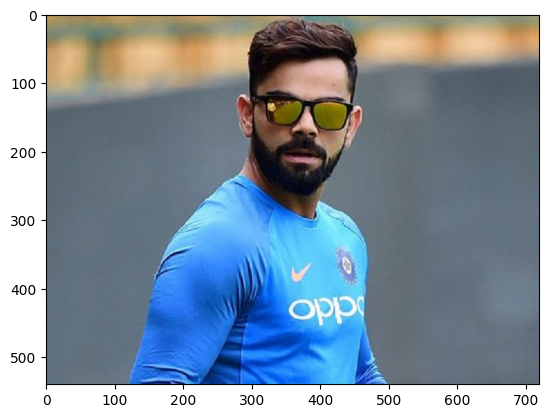

In [3]:
filename = 'img1.jpg'
img = read_file(filename)

###Convert to grayscale
org_img = np.copy(img)


Create Edge Mask

In [4]:
def edge_mark(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

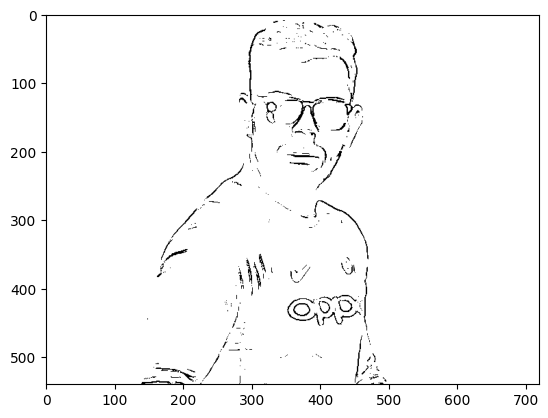

In [5]:
line_size, blur_value = 5, 7
edges = edge_mark(img, line_size, blur_value)

plt.imshow(edges, cmap='gray')
plt.show()

Reduce The Color Palette

In [6]:
def color_quantization(img, k):
    data = np.float32(img).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

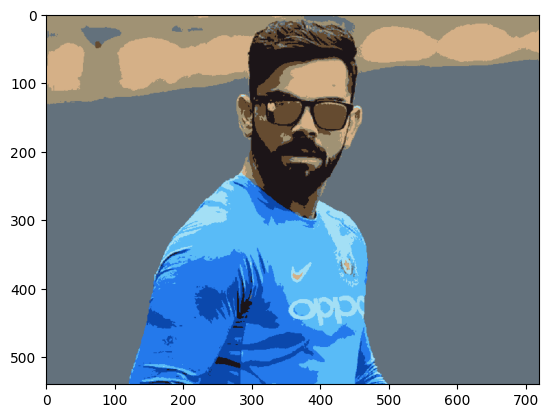

In [7]:
img = color_quantization(img, k=9)
plt.imshow(img)
plt.show()

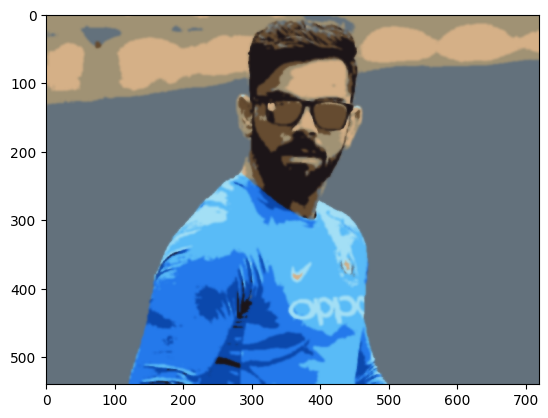

In [8]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

Combine Edge Mask With The Quantize Image

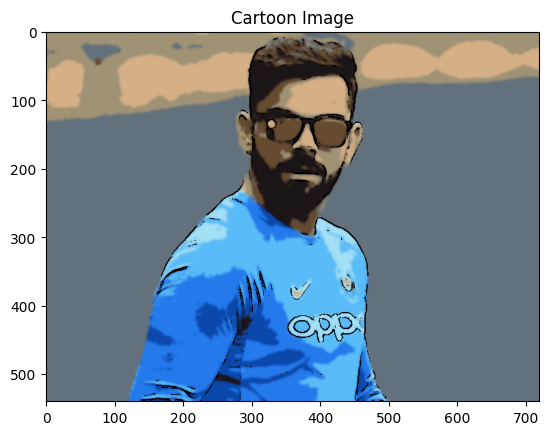

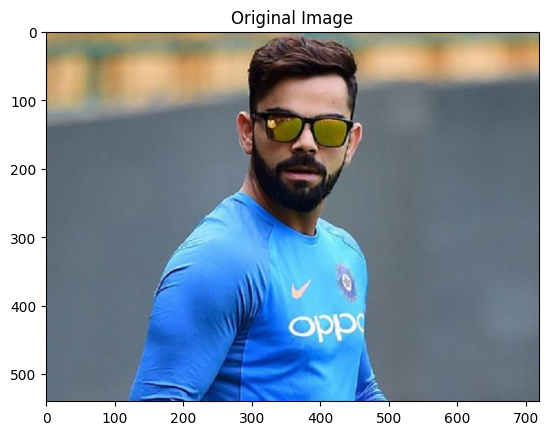

In [9]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)
    return c
c = cartoon()

plt.imshow(c)
plt.title('Cartoon Image')
plt.show()

plt.imshow(org_img)
plt.title('Original Image')
plt.show()